Analysis of WIPRO stock data (of past one year) in candle stick chart along with Bollinger Band indicator

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import plotly.graph_objs as go  #for candlestick chart visulization

[*********************100%***********************]  1 of 1 completed


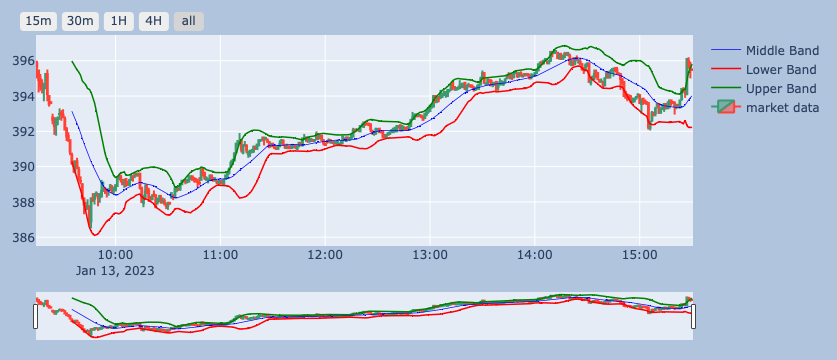

In [15]:
data = yf.download(tickers = "WIPRO.NS", period = '365', interval = '1m')

#bollinger band consist of 3 bands - middle band which is moving average and upper and lower which are standard deviations

data['Middle Band'] = data['Close'].rolling(window=21).mean()
data['Upper Band'] = data['Middle Band'] + 1.96*data['Close'].rolling(window=21).std()
data['Lower Band'] = data['Middle Band'] - 1.96*data['Close'].rolling(window=21).std()
fig = go.Figure()
fig.add_trace(go.Scatter(x=data.index, y= data['Middle Band'], line= dict(color="blue", width = .7), name= 'Middle Band'))
fig.add_trace(go.Scatter(x=data.index, y= data['Lower Band'], line= dict(color="red", width = 1.5), name= 'Lower Band'))
fig.add_trace(go.Scatter(x=data.index, y= data['Upper Band'], line= dict(color="green", width = 1.5), name = 'Upper Band'))

#candlestick

fig.add_trace(go.Candlestick(x=data.index, 
                             open= data['Open'],
                             high= data['High'],
                             low= data['Low'],
                             close= data['Close'],
                             name = 'market data'))
fig.update_xaxes(
    rangeslider_visible = True, 
    rangeselector = dict(
        buttons= list([
            dict(count = 15, label ="15m", step="minute", stepmode = "backward"),
            dict(count = 30, label = "30m", step="minute", stepmode = "backward"),
            dict(count = 1, label = "1H", step= "hour", stepmode = "todate"),
            dict(count = 4, label = "4H", step= "hour", stepmode= "backward"), 
            dict(step= "all")
        ])
    )
)

fig.update_layout(
   margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue")
#show

fig.show()


In [45]:
data

,Open,High,Low,Close,Adj Close,Volume,Middle Band,Upper Band,Lower Band
Datetime,,,,,,,,,
2023-01-13 09:30:00,116.550003,117.000000,116.410004,116.992104,116.992104,13504537,NaN,NaN,NaN
2023-01-13 09:31:00,117.000000,118.000000,116.820000,117.599899,117.599899,1815807,NaN,NaN,NaN
2023-01-13 09:32:00,117.570000,117.818497,116.830002,117.300003,117.300003,1465434,NaN,NaN,NaN
2023-01-13 09:33:00,117.334999,118.000000,117.099998,117.879997,117.879997,1257946,NaN,NaN,NaN
2023-01-13 09:34:00,117.900002,118.410004,117.510002,118.120003,118.120003,1261290,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2023-01-13 15:56:00,122.239998,122.379997,122.230003,122.311096,122.311096,546635,122.010033,122.332700,121.687366
2023-01-13 15:57:00,122.309998,122.495003,122.300003,122.470001,122.470001,712166,122.030509,122.408515,121.652503
2023-01-13 15:58:00,122.470001,122.629997,122.379997,122.389999,122.389999,1066255,122.045509,122.453460,121.637559
